# Denoising Cosmic-Ray Neutron Signal

A signal obtained from a cosmic-ray neutron detector is typically noisy due to the random nature of the collisions with the instrument. Larger instruments that integrate neutron counts for longer periods of time are typically less noisy than smaller instruments that measure counts every few minutes or hours.

In this exercise we are using the signal from a stationary neutron dectector deployed at the Konza Prairie. This information is used to monitor soil moisture content in the root-zone.

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal


In [2]:
# Read data
df = pd.read_csv("../datasets/passive_neutron_counts.csv")
df.head()


,TIMESTAMP,RECORD,D1,D2,D3,D4
0,9/13/19 4:28,111836,40,34,40,28
1,9/13/19 4:29,111837,42,50,46,45
2,9/13/19 4:30,111838,32,33,39,46
3,9/13/19 4:31,111839,37,38,38,43
4,9/13/19 4:32,111840,32,32,38,44


In [3]:
# Convert dates to Pandas datetime
df["TIMESTAMP"] = pd.to_datetime(df["TIMESTAMP"])


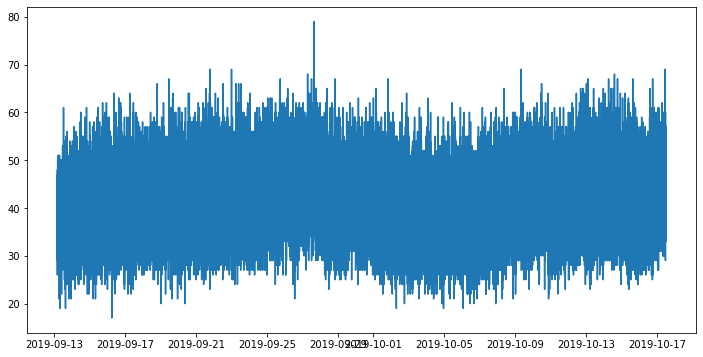

In [4]:
# Visualize signal
plt.figure(figsize=(12,6))
plt.plot(df["TIMESTAMP"], df["D1"])
plt.show()


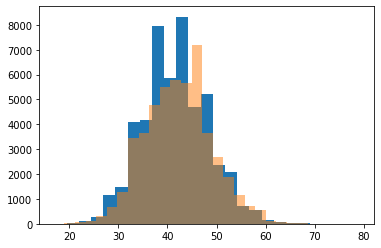

In [5]:
# Visualize histograms of detectors
plt.figure()
plt.hist(df['D1'], bins=25)
plt.hist(df['D2'], bins=25, alpha=0.5)
plt.show()


## Moving filters

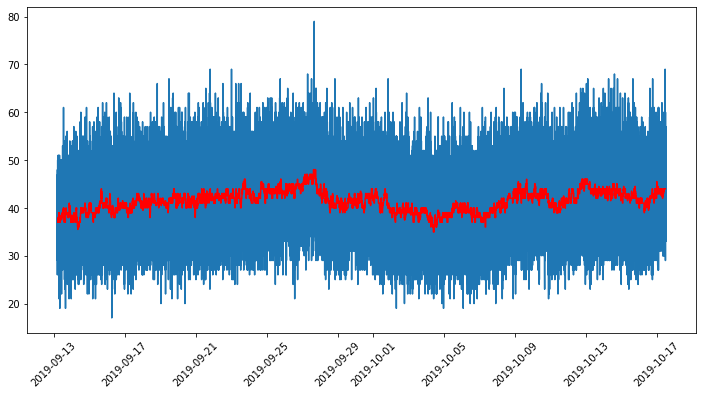

In [6]:
# Moving median
plt.figure(figsize=(12,6))
plt.plot(df["TIMESTAMP"], df["D1"])
plt.plot(df["TIMESTAMP"], df["D1"].rolling(window=100, center=True).median(), color='red' )
plt.xticks(rotation=45)
plt.show()


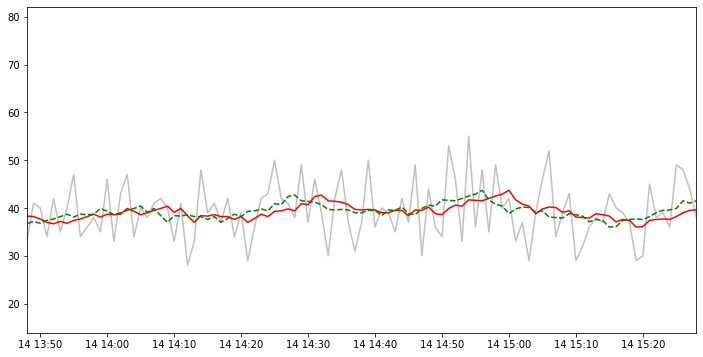

In [28]:
# Moving average
D1_forward_avg = df["D1"].rolling(window=10).mean() # Forward
D1_center_avg = df["D1"].rolling(window=10, center=True).mean() # Centered

plt.figure(figsize=(12,6))
plt.plot(df["TIMESTAMP"], df["D1"], color='k', alpha=0.25)
plt.plot(df["TIMESTAMP"], D1_forward_avg, '-r' )
plt.plot(df["TIMESTAMP"], D1_center_avg, '--g' )
plt.xlim(df["TIMESTAMP"][2000], df["TIMESTAMP"][2100])
plt.show()


In this particular application the use of either moving average is irrelevant due to the slow-changing neutron counts and the volume of observations with random noise. However, there could be substantial differences in datasets with well-defined patterns and sparser observations. To avoid shifting the timeseries, it is recommended to use a centered movivng filter.


In [9]:
# Compute sum of the four detectors for each timestamp
df["D_total"] = df[["D1","D2","D3","D4"]].sum(axis=1)

# Compute mean of the four detectors for each timestamp
df["D_mean"] = df[["D1","D2","D3","D4"]].mean(axis=1)

# Compute median of the four detectors for each timestamp
df["D_median"] = df[["D1","D2","D3","D4"]].median(axis=1)

# Examine subset
df.head()

,TIMESTAMP,RECORD,D1,D2,D3,D4,D_total,D_mean,D_median
0,2019-09-13 04:28:00,111836,40,34,40,28,142,35.50,37.0
1,2019-09-13 04:29:00,111837,42,50,46,45,183,45.75,45.5
2,2019-09-13 04:30:00,111838,32,33,39,46,150,37.50,36.0
3,2019-09-13 04:31:00,111839,37,38,38,43,156,39.00,38.0
4,2019-09-13 04:32:00,111840,32,32,38,44,146,36.50,35.0


In [10]:
# Apply a Savitzky-Golay filter
df["SGolay"] = signal.savgol_filter(df["D_total"], window_length=7, polyorder=2)
df.head()


,TIMESTAMP,RECORD,D1,D2,D3,D4,D_total,D_mean,D_median,SGolay
0,2019-09-13 04:28:00,111836,40,34,40,28,142,35.50,37.0,152.880952
1,2019-09-13 04:29:00,111837,42,50,46,45,183,45.75,45.5,158.142857
2,2019-09-13 04:30:00,111838,32,33,39,46,150,37.50,36.0,160.500000
3,2019-09-13 04:31:00,111839,37,38,38,43,156,39.00,38.0,159.952381
4,2019-09-13 04:32:00,111840,32,32,38,44,146,36.50,35.0,149.428571


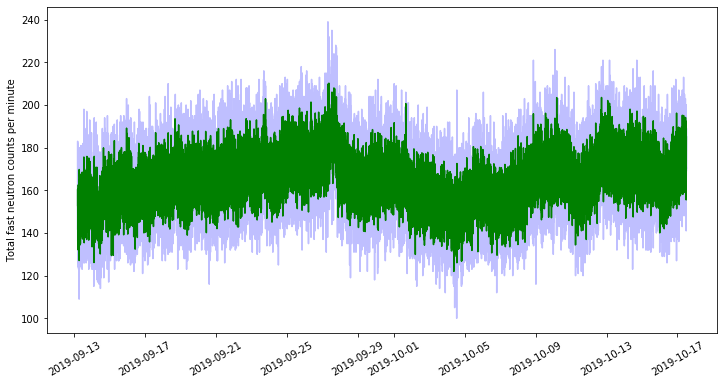

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df["TIMESTAMP"], df["D_total"], '-b', alpha=0.25)
plt.plot(df["TIMESTAMP"], df["SGolay"], color='g')
plt.xticks(rotation=30)
plt.ylabel("Total fast neutron counts per minute")
plt.show()


## References

Savitzky, A. and Golay, M.J., 1964. Smoothing and differentiation of data by simplified least squares procedures. Analytical chemistry, 36(8), pp.1627-1639.